# Курс Спортивный анализ данных. Платформа Kaggle

# Урок 1: введение в спортивный анализ данных, Exploration Data Analysis

**Задание 1:** 
Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

**Задание 2:** Сделать базовый анализ целевой переменной, сделать выводы;

**Задание 3:** Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

**Задание 4:** Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

**Задание 5:** Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

**Задание 6:** Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

**Задание 7 (опция):** Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

 ## Загрузка библиотек и модулей

In [1]:
# !pip install missingno

In [2]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

## Чтение данных

In [3]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

## Задание 1: 
Сделать базовый анализ данных: 
* вывести размерность датасетов, 
* посчитать базовые статистики, 
* выполнить анализ пропусков, 
* сделать выводы;

### Размерность датасетов

In [4]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


### Базовые статистики

In [5]:
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [6]:
# Базовые статистики по всем значениям, за исключением пропусков
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8          var_9         var_10  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       16.545850       0.284162       7.567236       0.394340   
std         3.418076       3.332634       1.235070       5.500793   
min         5.349700     -10.505500       3.970500     -20.731300   
25%        13.943800      -2.317800       6.618800      -3.594950   
50%        16.456800       0.393700       7.629600       0.487300   
75%        19.102900       2.937900       8.584425       4.382925   
max        27.691800      10.151300      11.150600      18.670200   

              var_11         var_12         var_13         var_14  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       -3.245596      14.023978       8.530232       7.537606   
std         5.970253       0.190059       4.639536       2.247908   
min       -26.095000      13.434600      -6.011100       1.013300   
25%        -7.510600      13.894000       5.072800       5.781875   
50%        -3.286950      14.025500       8.604250       7.520300   
75%         0.852825      14.164200      12.274775       9.270425   
max        17.188700      14.654500      22.331500      14.937700   

              var_15         var_16         var_17         var_18  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       14.573126       9.333264      -5.696731      15.244013   
std         0.411711       2.557421       6.712612       7.851370   
min        13.076900       0.635100     -33.380200     -10.664200   
25%        14.262800       7.452275     -10.476225       9.177950   
50%        14.574100       9.232050      -5.666350      15.196250   
75%        14.874500      11.055900      -0.810775      21.013325   
max        15.863300      17.950600      19.025900      41.748000   

              var_19         var_20         var_21         var_22  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       12.438567      13.290894      17.257883       4.305430   
std         7.996694       5.876254       8.196564       2.847958   
min       -12.402500      -5.432200     -10.089000      -5.322500   
25%         6.276475       8.627800      11.551000       2.182400   
50%        12.453900      13.196800      17.234250       4.275150   
75%        18.433300      17.879400      23.089050       6.293200   
max        35.183000      31.285900      49.044300      14.594500   

              var_23         var_24         var_25         var_26  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        3.019540      10.584400      13.667496      -4.055133   
std         0.526893       3.777245       0.285535       5.922210   
min   

После того, как мы получили общее представление о наборе данных, стоит поближе вглянуть на сами данные. С помощью методов __head()__, __tail()__ мы можем легко посмотреть начало и конец pandas.DataFrame, в котором сосредоточены данные.

In [7]:
train.head(10)

ID_code  target    var_0   var_1    var_2   var_3    var_4    var_5  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486   
5  train_5       0  11.4763 -2.3182  12.6080  8.6264  10.9621   3.5609   
6  train_6       0  11.8091 -0.0832   9.3494  4.2916  11.1355  -8.0198   
7  train_7       0  13.5580 -7.9881  13.8776  7.5985   8.6543   0.8310   
8  train_8       0  16.1071  2.4426  13.9307  5.6327   8.8014   6.1630   
9  train_9       0  12.5088  1.9743   8.8960  5.4508  13.6043 -16.2859   

    var_6    var_7   var_8   var_9  var_10   var_11   var_12   var_13  \
0  5.1187  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745   
1  5.6208  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135   
2  6.9427  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124   
3  5.8428  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704   
4  5.9405  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895   
5  4.5322  15.2255  3.5855  5.9790  0.8010  -0.6192  13.6380   1.2589   
6  6.1961  12.0771 -4.3781  7.9232 -5.1288  -7.5271  14.1629  13.3058   
7  5.6890  22.3262  5.0647  7.1971  1.4532  -6.7033  14.2919  10.9699   
8  4.4514  10.1854 -3.1882  9.0827  0.9501   1.7982  14.0654  -3.0572   
9  6.0637  16.8410  0.1287  7.9682  0.8787   3.0537  13.9639   0.8071   

    var_14   var_15   var_16   var_17   var_18   var_19   var_20   var_21  \
0   8.7989  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   
1   5.4345  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   
2   7.5244  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   
3   6.4569  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   
4   7.7894  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608   
5   8.1939  14.9894  12.0763  -1.4710   6.7341  14.8241  19.7172  11.9882   
6   7.8412  14.3363   7.5951  11.0922  21.1976   6.2946  15.8877  24.2595   
7   6.9190  14.2459   9.5376  -0.7226   5.1548  17.1535  13.7326  14.4195   
8  11.1642  14.8757  10.0075  -8.9472   3.8349   0.8560  10.6958   6.3738   
9   9.9240  15.2659  11.3900   1.5367   5.4649  13.6196  23.7806   4.4221   

    var_22  var_23   var_24   var_25   var_26  var_27  var_28  var_29  \
0   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965   
1   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481   
2   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439   
3   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407   
4  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352   
5   1.0468  3.8663   4.7252  13.9427  -1.2796 -4.3763  5.1494  0.4124   
6   8.1159  3.9769   7.6851  13.3600  -0.5156  0.0690  5.6452  4.6140   
7   1.2375  3.1711   9.1258  13.3250   3.3883 -0.4418  5.4501  7.9894   
8   6.5580  2.6182  13.2506  13.7929 -14.4918 -2.5407  5.9575  2.4882   
9   6.1695  3.2978   4.5923  13.3778  -3.2200 -2.3302  6.1120 -0.0289   

    var_30   var_31  var_32   var_33   var_34   var_35  var_36  var_37  \
0  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   
1  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434   
2 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346   
3 -15.2398  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   
4  -3.1582   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184   
5  -5.0732   4.9010  1.5459  15.6423  10.7209  15.1886  1.8685  7.7223   
6 -12.3890  12.0880 -1.5290   9.2376  11.1510   6.6352  4.8462  7.0202   
7  -0.9976  14.5609 -2.0712  16.9717  11.5257  -0.4990  2.8303  7.5772   
8 -11.1344  10.5106 -1.0573  19.3290  12.2897  -2.8160  6.9208  5.

In [8]:
stat_data = pd.DataFrame(columns=['train', 'test'])

In [9]:
def basic_analysis(data, data_name):
    
    stat_data.loc['Rows count', data_name] = data.shape[0]
    stat_data.loc['Columns count', data_name] = data.shape[1]
    
    dict_dtypes = {}
    for i in data.dtypes.unique():
        dict_dtypes[i] = 0
    for j in data.dtypes:
        dict_dtypes[j] += 1  
    for k, v in dict_dtypes.items():
        stat_data.loc[f'Count of {k} features', data_name] = v
        
    list_nan = 0
    for i in data.count():
        if i != data.shape[0]:
            list_nan += 1
    stat_data.loc[f'Count of NaN', data_name] = list_nan
    
    list_disc = 0
    list_cont = 0
    for i in data.columns:
        if data[i].dtype != object:
            if data[i].nunique() < 25:
                list_disc += 1
            else:
                list_cont += 1          
    stat_data.loc[f'Discrete variables count', data_name] = list_disc
    stat_data.loc[f'Continuous features count', data_name] = list_cont
    
    dict_num = {'units': 0, 'tens': 0, 'others': 0}
    for i in data.columns:
        if data[i].dtype != object:
            num = len(str(round(abs(max(data[i])))))
            if num == 1:
                dict_num['units'] += 1
            elif num == 2:
                dict_num['tens'] += 1
            else:
                dict_num['others'] += 1
    for k, v in dict_num.items():
        stat_data.loc[f'Scale of features in {k}', data_name] = v

In [10]:
basic_analysis(data=train, data_name='train')
basic_analysis(data=test, data_name='test')

In [11]:
stat_data

train    test
Rows count                   200000  200000
Columns count                   202     201
Count of object features          1       1
Count of int64 features           1     NaN
Count of float64 features       200     200
Count of NaN                      0       0
Discrete variables count          1       0
Continuous features count       200     200
Scale of features in units       30      31
Scale of features in tens       171     169
Scale of features in others       0       0

In [12]:
train['ID_code'].head()

0    train_0
1    train_1
2    train_2
3    train_3
4    train_4
Name: ID_code, dtype: object

In [13]:
test['ID_code'].head()

0    test_0
1    test_1
2    test_2
3    test_3
4    test_4
Name: ID_code, dtype: object

### Анализ пропусков

<AxesSubplot:>

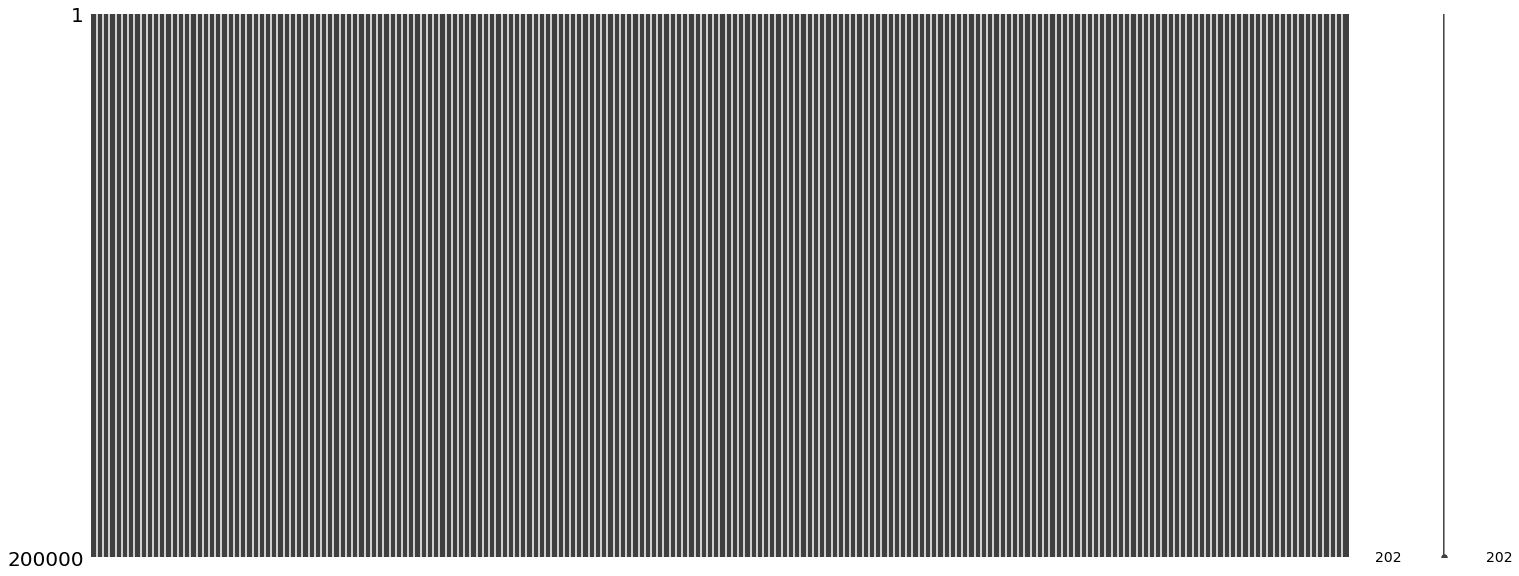

In [14]:
msno.matrix(train)

<AxesSubplot:>

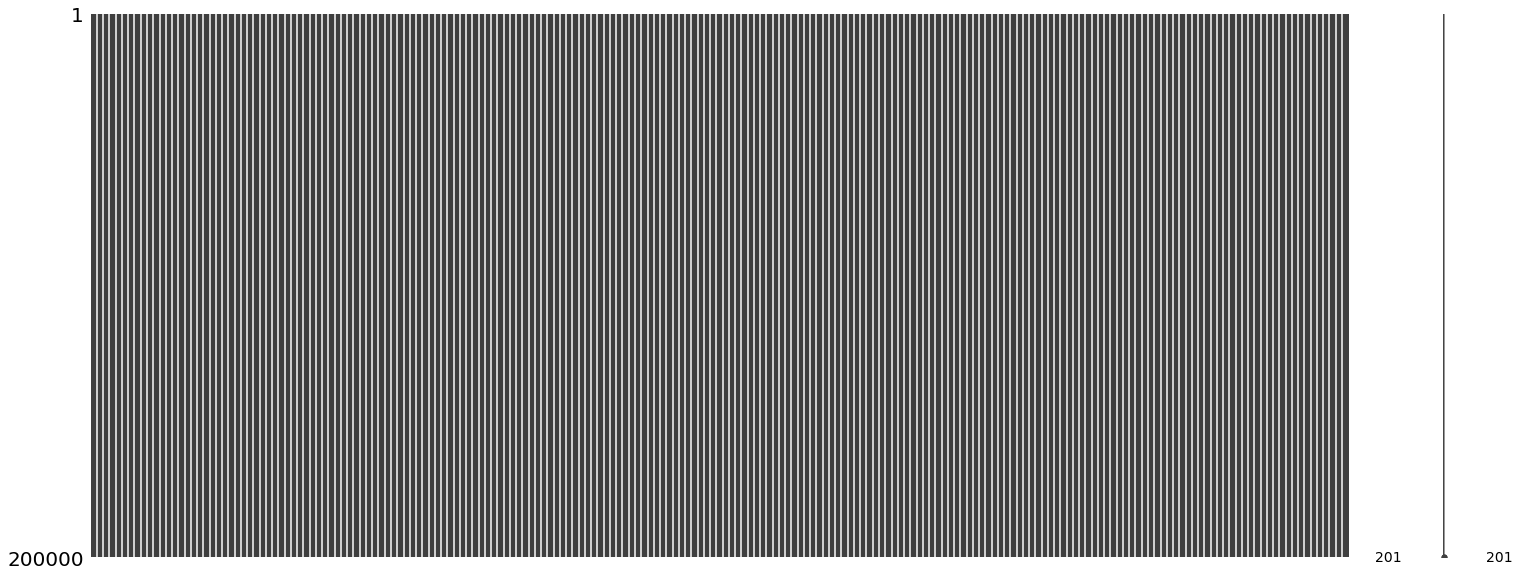

In [15]:
msno.matrix(test)

### Вывод:
1. Целевая переменная target имеется в обучающей выборке, отсутствует в тестовой выборке. Если не принимать её во внимание, то в обучающей выборке и в тестовой выборке 201 признак, в том числе:
* 200 числовых признаков 
* 1 категориальный признак - это ID

2. Во всех числовых признаках значения непрерывные.

3. Пропуски отсутствуют.

## Задание 2: 
* Сделать базовый анализ целевой переменной, 
* сделать выводы;

In [16]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [17]:
train['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [18]:
train['target'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
Name: target, dtype: int64

In [9]:
numerical_features = train.select_dtypes(include=[np.number])

discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25
]

discrete_feature

['target']

### Вывод:

1. Целевая переменная состоит из 0 и 1. Следовательно, у нас задача бинарной классификации.
2. Соотношение двух классов целевой переменной составляет 1:9. Возможно это естественное свойство данных и проблемы дисбаланса данных нет.

### Задание 3: 
Построить распределение признаков
* в зависимости от значения целевой переменной и
* распределение признаков для обучающей и тестовой выборки 

(если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [10]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in discrete_feature]

print(f"Continuous features count {len(continuous_feature)}")

Continuous features count 200


Для непрерывные признаков имеет смысл строить гистрограммы распределения или функции распределения, а также зависимость непрерывного признака в разрезе целевой переменной. Кроме того, имеет смысл строить распределение __одновременно__ и для обучающей выборки, и для тестовой для понимания насколько отличаются распределения.

### Гистограммы распределения непрерывных признаков для обучающей выборки

Wall time: 12.6 s


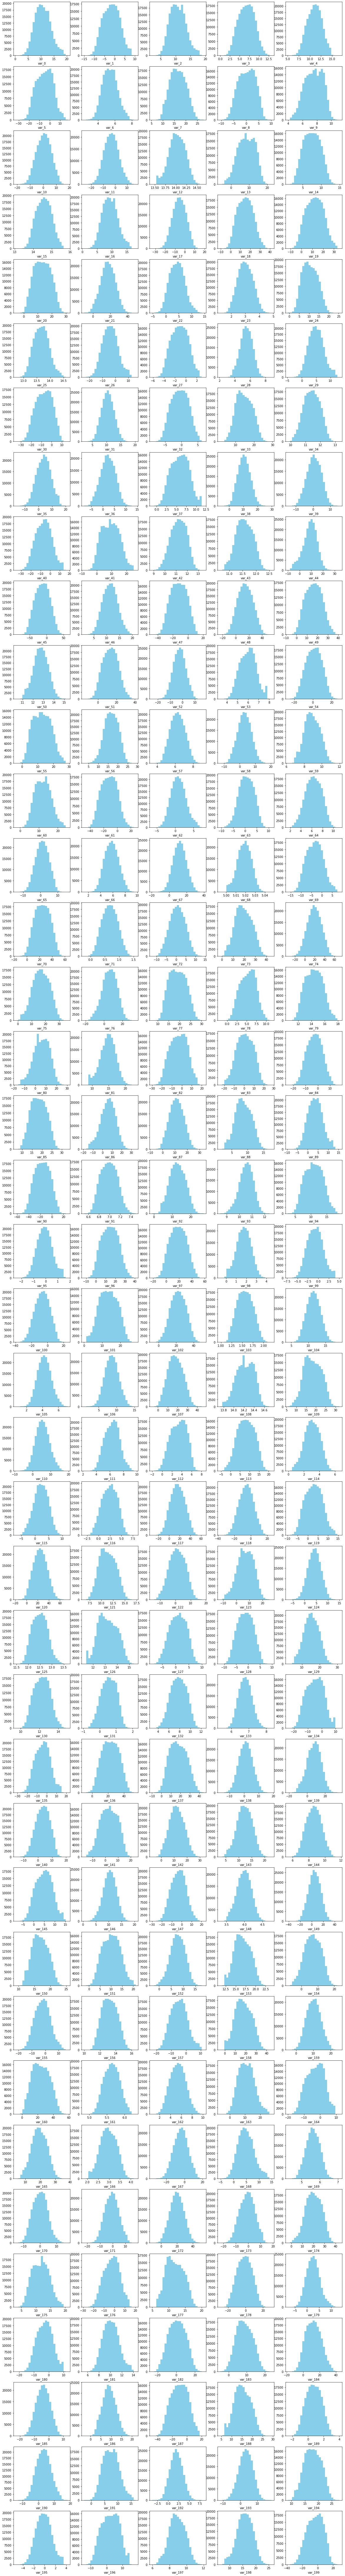

In [21]:
%%time

features = continuous_feature
cols = 5
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num//cols, num%cols].hist(data, bins=25, color="skyblue")
    axes[num//cols, num%cols].set_xlabel(feature, fontsize=10)

### Функции распределения непрерывных признаков для обучающей и тестовой выборки

Wall time: 11min 55s


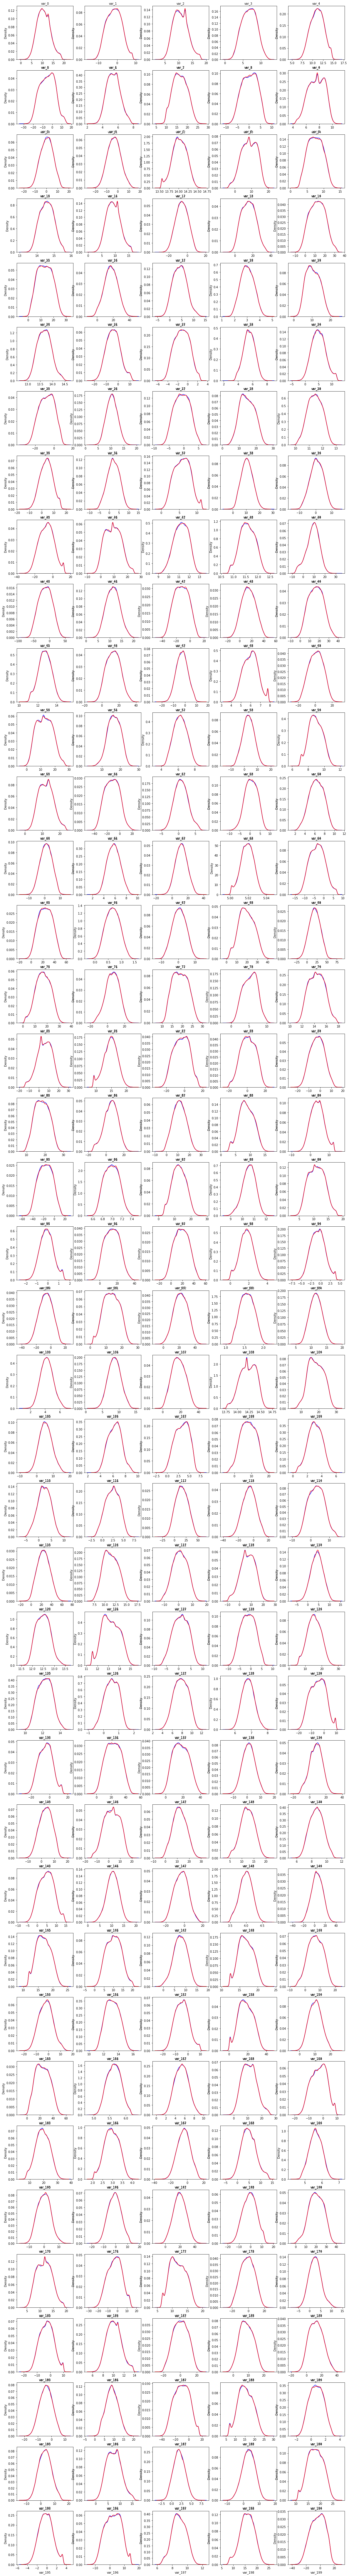

In [22]:
%%time

features = continuous_feature
cols = 5
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(features):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="blue", label="train")
        sns.kdeplot(test_data, ax=axes[num//cols, num%cols], color="red", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//cols, num%cols], color="blue", label="train")
    axes[num//cols, num%cols].set_title(feature, fontsize=10)

### Зависимость непрерывного признака в разрезе целевой переменной

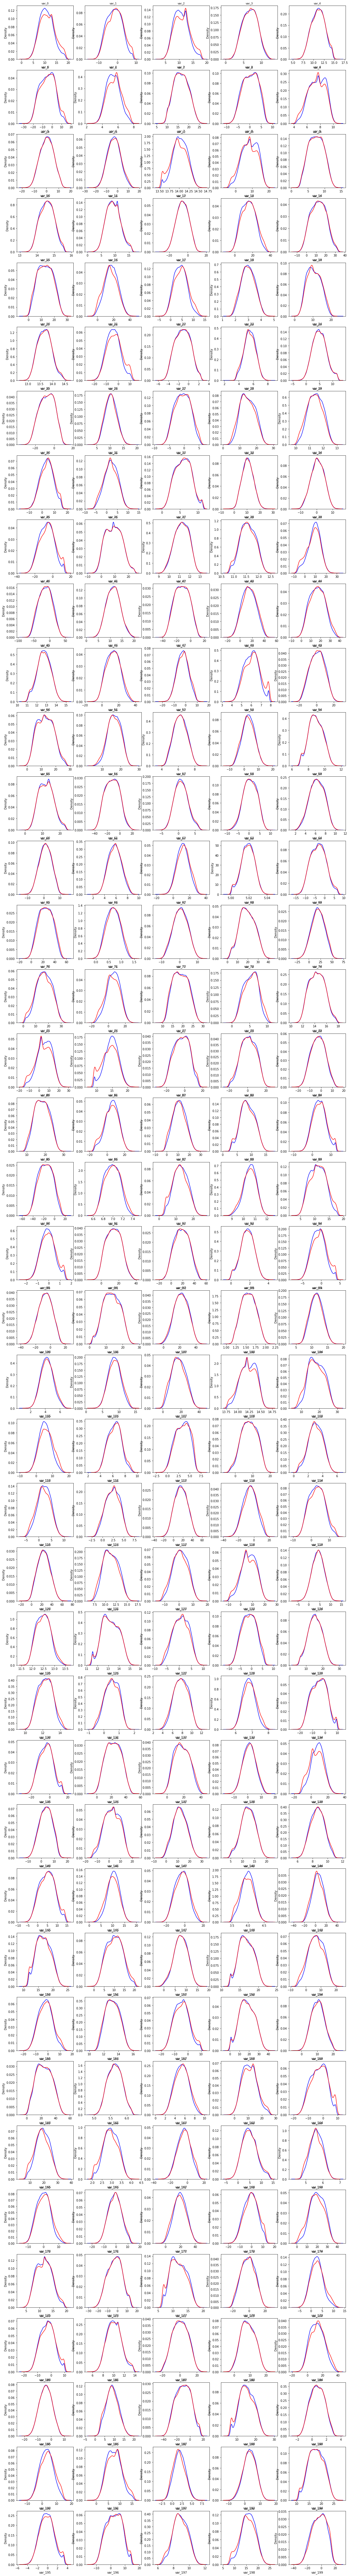

Wall time: 6min 36s


In [15]:
%%time

target_name = 'target'
features = continuous_feature
cols = 5
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(features):
    limit_bal_with_target = train[[feature, target_name]]
    limit_bal = limit_bal_with_target[feature]
    limit_bal_target_0 = limit_bal[limit_bal_with_target[target_name] == 0]
    limit_bal_target_1 = limit_bal[limit_bal_with_target[target_name] == 1]

    sns.kdeplot(limit_bal_target_0, ax=axes[num//cols, num%cols], label='0', color='blue')
    sns.kdeplot(limit_bal_target_1, ax=axes[num//cols, num%cols], label='1', color='red')
    axes[num//cols, num%cols].set_title(feature, fontsize=9)

plt.show()

In [13]:
target = train['target']

Wall time: 26.3 s


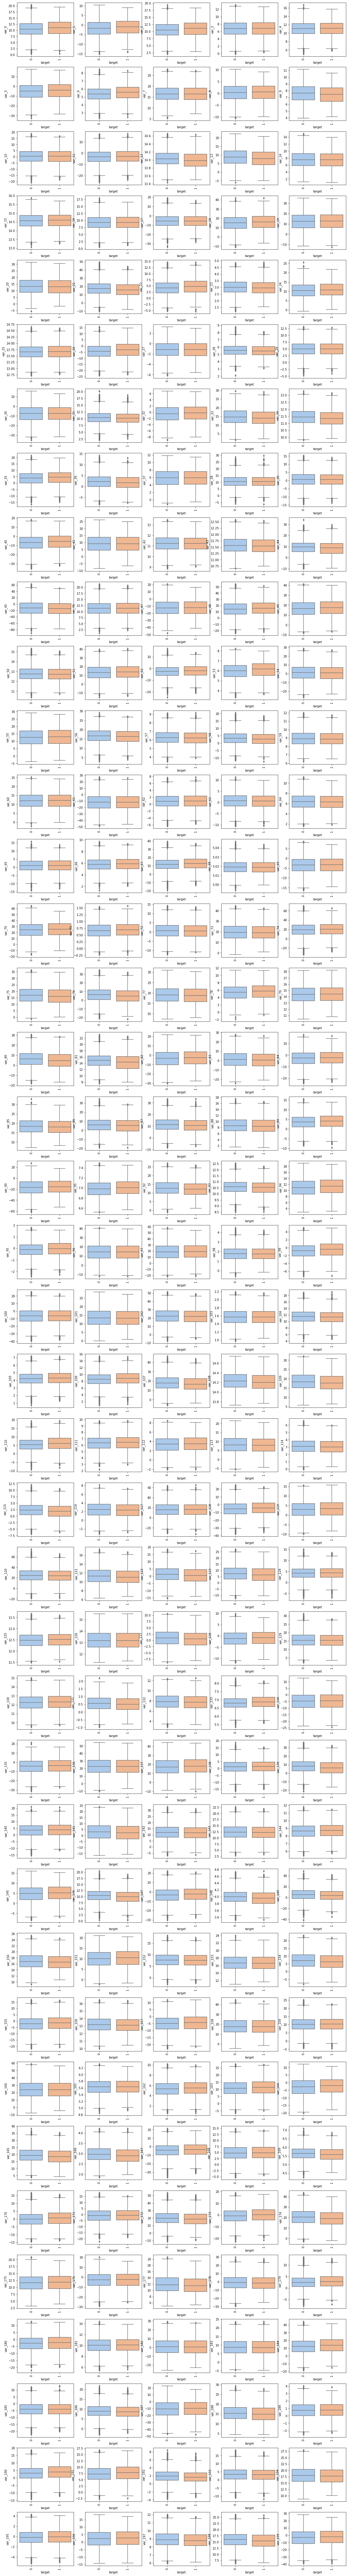

In [24]:
%%time

features = continuous_feature
cols = 5
x = len(features)/cols
rows = round(x if int(x) == x else (x) + 0.5)

fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(features):
    data = train[feature].copy()
    sns.boxplot(y=feature, x=target, data=train, palette="pastel", ax=axes[num//cols, num%cols]) 
    axes[num//cols, num%cols].tick_params(axis="x", rotation=90)

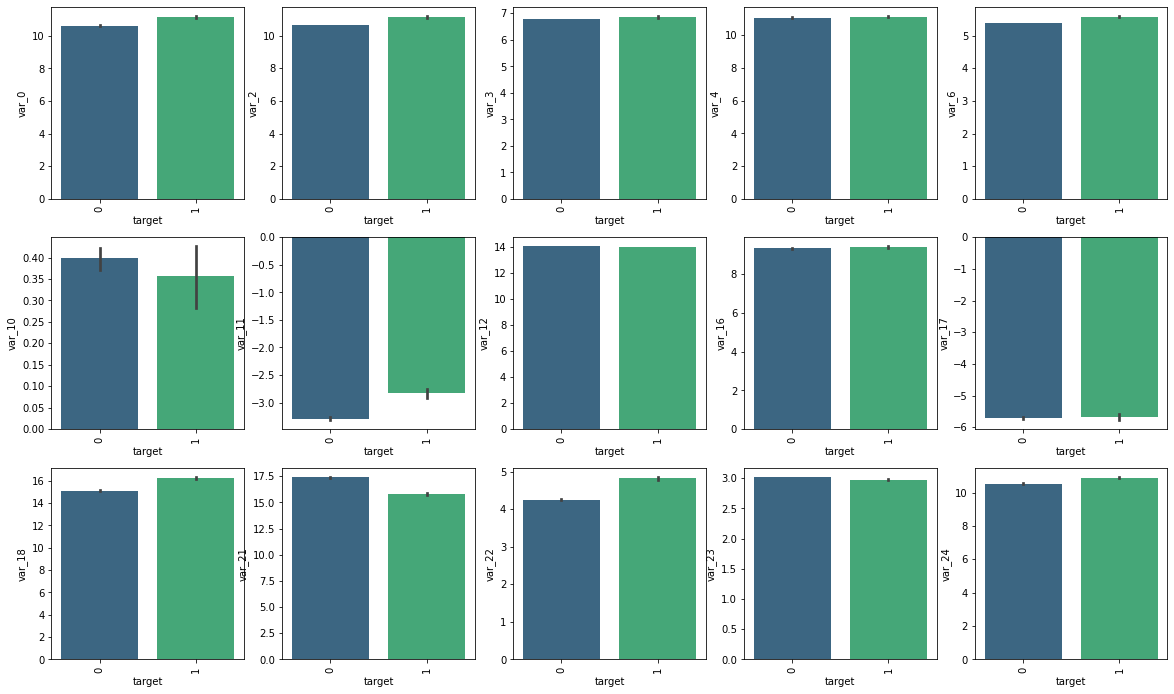

In [16]:
some_features = ['var_0', 'var_2', 'var_3', 'var_4', 'var_6',
                 'var_10', 'var_11', 'var_12', 'var_16', 'var_17',
                'var_18', 'var_21', 'var_22', 'var_23', 'var_24']

cols = 5
rows = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(some_features):
    data = train[feature].copy()
    sns.barplot(y=feature, x=target, data=train, palette="viridis", ax=axes[num//cols, num%cols]) 
    axes[num//cols, num%cols].tick_params(axis="x", rotation=90)

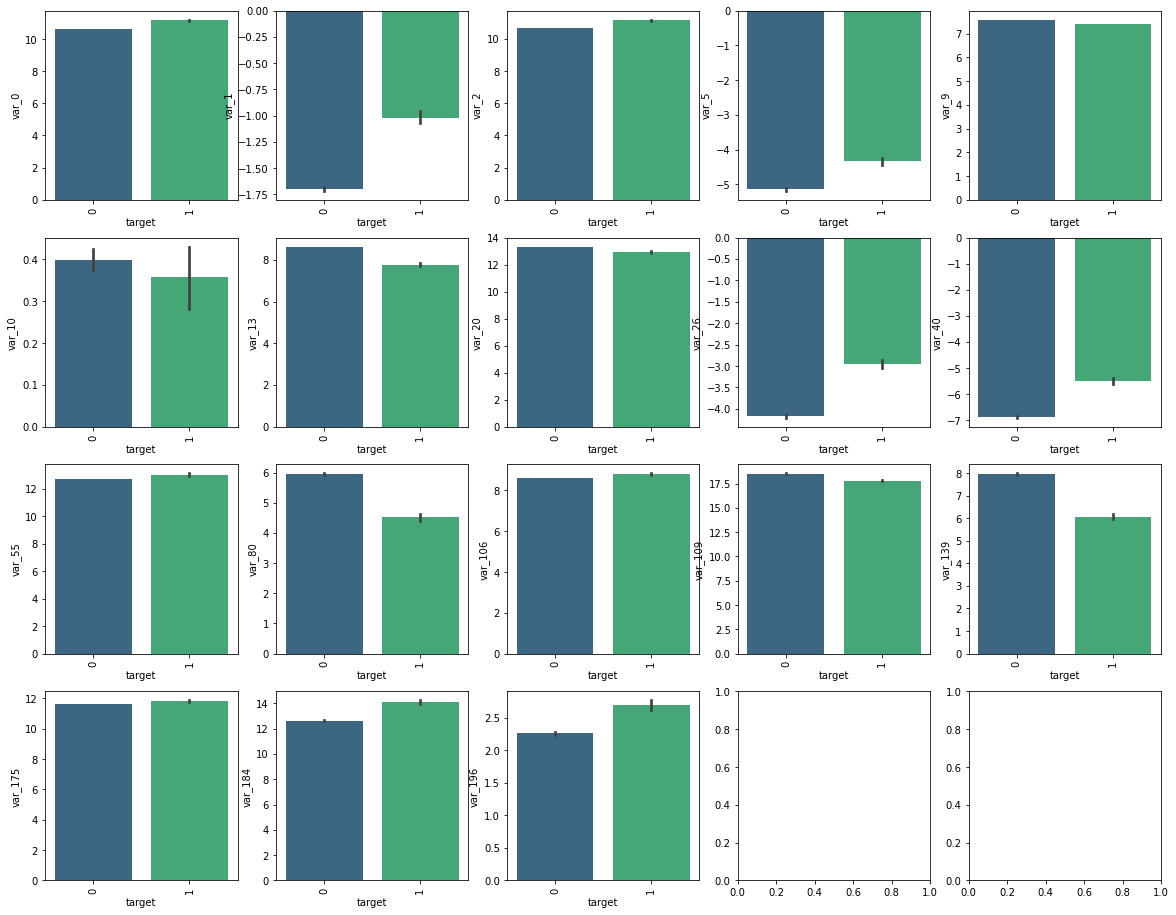

In [17]:
# для признаков var_0, var_1, var_2, var_5, var_9, 
# var_10, var_13, var_20, var_26, var_40, 
# var_55, var_80, var_106, var_109, var_139,
# var_175, var_184, var_196
some_features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9',
                 'var_10', 'var_13', 'var_20', 'var_26', 'var_40',
                'var_55', 'var_80', 'var_106', 'var_109', 'var_139',
                'var_175', 'var_184', 'var_196']

cols = 5
rows = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, (20/cols)*rows))

for num, feature in enumerate(some_features):
    data = train[feature].copy()
    sns.barplot(y=feature, x=target, data=train, palette="viridis", ax=axes[num//cols, num%cols]) 
    axes[num//cols, num%cols].tick_params(axis="x", rotation=90)

### Вывод:

1. Визуально распределения признаков на обучающей выборке и тестовой выборке совпадают и близки к нормальному.

2. Для некоторых признаков визуально различаются выбросы на обучающей и тестовой выборке: на обучающей выборке выбросы представлены чаще, чем на тестовой. Например, `var_0`, `var_2`, `var_3`, `var_4`, `var_6`, `var_10`, `var_11`, `var_12` и т.д. Далее при обучении желательно контролировать возможность обучения на выбросах.

3. Для некоторых признаков визуально различаются доли в разрезе целевой переменной. Например, `var_1`, `var_5`, `var_10`, `var_26`, `var_40`, `var_80`, `var_139`, `var_184`, `var_196`

## Задание 4: 
Построить 
* распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и 
* распределение основных статистик обучающей и тестовой выборки, 
* сделать выводы;

In [30]:
target1 = train.loc[train['target']==1, :].describe()
target0 = train.loc[train['target']==0, :].describe()

In [31]:
target1

target         var_0         var_1         var_2         var_3  \
count  20098.0  20098.000000  20098.000000  20098.000000  20098.000000   
mean       1.0     11.156418     -1.017613     11.156633      6.864113   
std        0.0      3.270293      4.220638      2.841075      2.070898   
min        1.0      0.452800    -14.037000      2.946200      0.374000   
25%        1.0      8.695875     -4.203475      8.961125      5.314300   
50%        1.0     11.001350     -0.992650     11.096700      6.900200   
75%        1.0     13.343700      2.001375     13.047025      8.384725   
max        1.0     19.458300      9.029800     18.294100     12.706900   

              var_4         var_5         var_6         var_7         var_8  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      11.131337     -4.336522      5.581966     16.514917      0.479432   
std        1.649266      8.140281      0.922442      3.421365      3.340028   
min        5.876200    -28.246100      2.496000      7.302400     -9.839100   
25%        9.911250    -10.615800      4.882250     13.880125     -2.107425   
50%       11.156300     -4.101950      5.601800     16.412700      0.579600   
75%       12.328450      1.619950      6.218550     19.044250      3.127825   
max       15.692500     16.423600      8.285200     27.039800      9.033000   

              var_9        var_10        var_11        var_12        var_13  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean       7.409064      0.357916     -2.834888     13.984464      7.764618   
std        1.278709      5.515060      6.083536      0.207935      4.888186   
min        4.186100    -18.386600    -23.707100     13.499400     -4.966100   
25%        6.451575     -3.670500     -7.169000     13.843225      4.227425   
50%        7.484950      0.446300     -2.898150     13.982600      7.927700   
75%        8.437200      4.412475      1.327125     14.141600     11.646650   
max       10.588100     16.800300     17.188700     14.633400     20.745900   

             var_14        var_15        var_16        var_17        var_18  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean       7.495020     14.594414      9.395369     -5.679385     16.265343   
std        2.246319      0.418237      2.605433      6.677587      8.179688   
min        1.013300     13.287000      1.369900    -28.086100     -6.587000   
25%        5.727000     14.282000      7.469650    -10.445650     10.041300   
50%        7.505950     14.596950      9.258550     -5.630500     16.212100   
75%        9.227450     14.895300     11.120350     -0.826425     22.162200   
max       13.898700     15.698200     16.457000     16.295200     41.748000   

             var_19        var_20        var_21        var_22        var_23  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      12.708704     12.968654     15.823715      4.821429      2.979384   
std        8.128723      5.908411      8.578688      3.067136      0.535207   
min      -12.402500     -1.625800     -8.005400     -5.322500      1.538600   
25%        6.505825      8.274425      9.763125      2.534575      2.590600   
50%       12.704700     12.932750     15.592050      4.809300      2.968850   
75%       18.703600     17.534325     22.030475      6.906200      3.363975   
max       34.712800     30.475700     43.952100     14.594500      4.875200   

             var_24        var_25        var_26        var_27        var_28  \
count  20098.000000  20098.000000  20098.000000  20098.000000  20098.000000   
mean      10.906222     13.678882     -2.949112     -1.140560      5.476866   
std        3.836304      0.290182      6.446004      1.532760      0.803272   
min        0.238200     12.782000    -23.281000     -5.599200      3.092900   
25%        7.966425     13.463925     -7.720300     -2.318675      4.926025   
50%       10.680050

In [32]:
target0

target          var_0          var_1          var_2          var_3  \
count  179902.0  179902.000000  179902.000000  179902.000000  179902.000000   
mean        0.0      10.626681      -1.695770      10.665876       6.788979   
std         0.0       3.008564       4.024813       2.612961       2.040082   
min         0.0       0.408400     -15.043400       2.117100      -0.040200   
25%         0.0       8.429500      -4.790775       8.698025       5.247625   
50%         0.0      10.478600      -1.682600      10.529000       6.817000   
75%         0.0      12.693075       1.287700      12.463900       8.317875   
max         0.0      20.315000      10.376800      19.353000      13.188300   

               var_4          var_5          var_6          var_7  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       11.072412      -5.146736       5.389620      16.549306   
std         1.620103       7.827522       0.857983       3.417700   
min         5.074800     -32.562600       2.347300       5.349700   
25%         9.880600     -11.260950       4.756425      13.950125   
50%        11.104400      -4.917700       5.364400      16.460850   
75%        12.253100       0.844600       5.981300      19.108800   
max        16.671400      17.251600       8.447700      27.691800   

               var_8          var_9         var_10         var_11  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean        0.262347       7.584907       0.398410      -3.291479   
std         3.331105       1.228839       5.499197       5.955722   
min       -10.505500       3.970500     -20.731300     -26.095000   
25%        -2.342575       6.637500      -3.586100      -7.544275   
50%         0.371400       7.645600       0.491600      -3.327200   
75%         2.919300       8.598075       4.379575       0.801950   
max        10.151300      11.150600      18.670200      16.851700   

              var_12         var_13         var_14         var_15  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       14.028392       8.615764       7.542364      14.570748   
std         0.187441       4.603038       2.248042       0.410909   
min        13.434600      -6.011100       1.169000      13.076900   
25%        13.899525       5.168700       5.787400      14.261025   
50%        14.029600       8.689700       7.522250      14.571500   
75%        14.166600      12.334400       9.275875      14.872200   
max        14.654500      22.331500      14.937700      15.863300   

              var_16         var_17         var_18         var_19  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean        9.326326      -5.698669      15.129914      12.408389   
std         2.551915       6.716530       7.805564       7.981264   
min         0.635100     -33.380200     -10.664200     -11.557600   
25%         7.450000     -10.480375       9.091600       6.251950   
50%         9.228750      -5.670250      15.082250      12.427450   
75%        11.048900      -0.808650      20.890675      18.403775   
max        17.950600      19.025900      41.748000      35.183000   

              var_20         var_21         var_22         var_23  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       13.326894      17.418103       4.247785       3.024026   
std         5.871569       8.137105       2.816560       0.525768   
min        -5.432200     -10.089000      -5.164000       1.209800   
25%         8.664650      11.742475       2.147800       2.639225   
50%        13.228200      17.408200       4.216600       3.013500   
75%        17.920200      23.195000       6.224800       3.408000   
max        31.285900      49.044300      14.594500       4.849700   

              var_24         var_25         var_26         var_27  \
count  179902.000000  179902.000000  179902.000000  179902.000000   
mean       10.548447      13.666224      -4.17869

In [33]:
df_stat = pd.DataFrame(data = {'mean_0': target0.loc['mean'],
                               'mean_1': target1.loc['mean'],
                               'std_0': target0.loc['std'],
                               'std_1': target1.loc['std'],
                              })

In [34]:
# Сброс ограничений на число строк
pd.set_option('display.max_rows', None)

In [35]:
df_stat

mean_0     mean_1      std_0      std_1
target    0.000000   1.000000   0.000000   0.000000
var_0    10.626681  11.156418   3.008564   3.270293
var_1    -1.695770  -1.017613   4.024813   4.220638
var_2    10.665876  11.156633   2.612961   2.841075
var_3     6.788979   6.864113   2.040082   2.070898
var_4    11.072412  11.131337   1.620103   1.649266
var_5    -5.146736  -4.336522   7.827522   8.140281
var_6     5.389620   5.581966   0.857983   0.922442
var_7    16.549306  16.514917   3.417700   3.421365
var_8     0.262347   0.479432   3.331105   3.340028
var_9     7.584907   7.409064   1.228839   1.278709
var_10    0.398410   0.357916   5.499197   5.515060
var_11   -3.291479  -2.834888   5.955722   6.083536
var_12   14.028392  13.984464   0.187441   0.207935
var_13    8.615764   7.764618   4.603038   4.888186
var_14    7.542364   7.495020   2.248042   2.246319
var_15   14.570748  14.594414   0.410909   0.418237
var_16    9.326326   9.395369   2.551915   2.605433
var_17   -5.698669  -5.679385   6.716530   6.677587
var_18   15.129914  16.265343   7.805564   8.179688
var_19   12.408389  12.708704   7.981264   8.128723
var_20   13.326894  12.968654   5.871569   5.908411
var_21   17.418103  15.823715   8.137105   8.578688
var_22    4.247785   4.821429   2.816560   3.067136
var_23    3.024026   2.979384   0.525768   0.535207
var_24   10.548447  10.906222   3.768895   3.836304
var_25   13.666224  13.678882   0.284984   0.290182
var_26   -4.178694  -2.949112   5.847831   6.446004
var_27   -1.137611  -1.140560   1.522704   1.532760
var_28    5.539248   5.476866   0.780864   0.803272
var_29    5.049780   5.090517   2.613970   2.633303
var_30   -7.689438  -7.672537   7.967595   7.943894
var_31   10.411541  10.227496   2.159704   2.154552
var_32   -0.539278  -0.276639   2.579291   2.651428
var_33   14.838196  14.200831   4.302266   4.457194
var_34   11.443788  11.348866   0.538577   0.560916
var_35    3.779194   4.409162   5.158947   5.327264
var_36    2.227270   1.828816   3.107991   3.203155
var_37    5.863121   5.920623   2.246682   2.276233
var_38   10.640744  10.654546   4.276824   4.297554
var_39    0.668519   0.613162   4.066858   4.086348
var_40   -6.862568  -5.498624   8.215720   8.732590
var_41    9.302433   9.276805   5.932132   5.991237
var_42   11.224302  11.204937   0.695376   0.701254
var_43   11.572909  11.543503   0.308432   0.318652
var_44    9.045045   8.082197   5.835214   6.414395
var_45  -12.556114 -13.984647  21.397421  21.429591
var_46   11.321047  11.375188   2.856575   2.895122
var_47  -12.503504 -12.187384  10.581927  10.557365
var_48   14.581677  15.806031  11.363231  11.513367
var_49   16.602122  17.401971   7.828251   8.062448
var_50   12.744200  12.712219   0.689783   0.708083
var_51   13.357783  14.065603   8.148343   8.501894
var_52   -2.575063  -2.114843   4.969899   5.104844
var_53    5.992363   6.153627   0.756300   0.822540
var_54    1.181542   0.739460   8.408994   8.450879
var_55   12.713185  13.038255   5.680993   5.762603
var_56   16.670579  16.258461   3.520147   3.694106
var_57    6.276124   6.235222   0.794372   0.799936
var_58    3.212497   2.865556   4.282470   4.409752
var_59    8.934109   8.904403   0.854149   0.860148
var_60   12.146777  12.234763   4.210185   4.329399
var_61  -11.975518 -11.689180  11.616441  11.678168
var_62    0.864765   0.958362   2.021532   2.066026
var_63    0.676438   0.524536   3.107616   3.158456
var_64    6.376013   6.307787   1.484106   1.500046
var_65    0.968699   1.109933   3.785236   3.795465
var_66    5.785376   5.871587   1.118519   1.143637
var_67   11.833250  12.927617   7.330663   7.596216
var_68    5.018922   5.018636   0.007167   0.007351
var_69   -3.342466  -3.233487   3.943928   4.058563
var_70   24.339961  25.403251  11.935581  12.053624
var_71    0.666760   0.696571   0.265989   0.271486
var_72    0.657700   0.487071   3.937950   4.001472
var_73   19.627010  19.466573   7.463417   7.490732
var_74   19.424857  20.360168  14.101676  14.182555
var_75  

In [36]:
df_stat_train_test = pd.DataFrame(data = {'mean_train': train.describe().loc['mean'],
                               'mean_test': test.describe().loc['mean'],
                               'std_train': train.describe().loc['std'],
                               'std_test': test.describe().loc['std'],
                              })

In [37]:
df_stat_train_test

mean_train  mean_test  std_train   std_test
target     0.100490        NaN   0.300653        NaN
var_0     10.679914  10.658737   3.040051   3.036716
var_1     -1.627622  -1.624244   4.050044   4.040509
var_10     0.394340   0.371335   5.500793   5.508661
var_100   -6.600518  -6.674013   9.181683   9.181642
var_101   13.413526  13.389322   4.950537   4.953360
var_102   22.294908  22.334372   8.628179   8.630791
var_103    1.568393   1.568707   0.185020   0.185295
var_104   11.509834  11.523125   1.970520   1.974172
var_105    4.244744   4.244311   0.855698   0.857720
var_106    8.617657   8.621051   1.894899   1.890661
var_107   17.796266  17.824277   7.604723   7.598867
var_108   14.224435  14.225107   0.171091   0.171439
var_109   18.458001  18.455457   4.355031   4.368647
var_11    -3.245596  -3.268551   5.970253   5.961443
var_110    5.513238   5.497816   3.823253   3.834687
var_111    6.312603   6.313691   1.082404   1.080271
var_112    3.317843   3.311793   1.591170   1.592758
var_113    8.136542   8.145250   4.459077   4.472500
var_114    3.081191   3.086162   0.985396   0.983776
var_115    2.213717   2.199727   2.621851   2.622971
var_116    2.402570   2.392058   1.650912   1.652755
var_117   16.102233  16.039925  13.297662  13.256813
var_118   -5.305132  -5.310524   8.799268   8.767417
var_119    3.032849   3.060541   4.182796   4.175211
var_12    14.023978  14.022662   0.190059   0.190071
var_120   24.521078  24.536099  12.121016  12.105735
var_121   11.310591  11.312735   1.714416   1.708636
var_122    1.192984   1.191748   5.168479   5.145416
var_123    7.076254   7.023936   6.147345   6.140683
var_124    4.272740   4.279579   2.736821   2.728711
var_125   12.489165  12.488117   0.318100   0.317715
var_126   13.202326  13.205603   0.776056   0.779032
var_127    0.851507   0.847175   3.137684   3.150284
var_128   -1.127952  -1.132617   3.238043   3.243374
var_129   15.460314  15.435012   4.136453   4.146347
var_13     8.530232   8.540872   4.639536   4.628712
var_130   12.257151  12.256858   0.832199   0.832933
var_131    0.544674   0.547403   0.456280   0.456736
var_132    7.799676   7.801597   1.456486   1.454610
var_133    6.813270   6.814902   0.375603   0.375246
var_134   -4.826053  -4.806086   6.166126   6.170636
var_135   -4.259472  -4.309017   7.617732   7.616104
var_136   22.968602  23.019125  10.382235  10.373414
var_137   17.613651  17.647446   8.890516   8.889635
var_138    1.210792   1.243290   4.551750   4.564611
var_139    7.760193   7.765888   7.686433   7.683951
var_14     7.537606   7.532703   2.247908   2.255257
var_140    3.423636   3.411716   4.896325   4.907185
var_141    2.897596   2.873279   6.715637   6.732620
var_142   11.983489  11.971068   5.691936   5.685169
var_143   12.333698  12.335213   2.934706   2.941028
var_144    8.647632   8.644856   0.922469   0.923951
var_145    4.841328   4.860353   3.899281   3.897157
var_146   10.341178  10.362214   2.518883   2.514621
var_147   -3.300779  -3.238206   7.413301   7.444975
var_148    3.990726   3.991193   0.199192   0.198559
var_149    5.296237   5.276210  10.385133  10.374152
var_15    14.573126  14.573704   0.411711   0.411592
var_150   16.817671  16.820051   2.464157   2.463189
var_151   10.141542  10.156002   3.962426   3.971911
var_152    7.633199   7.628824   3.005373   3.015322
var_153   16.727902  16.721077   2.014200   2.013893
var_154    6.974955   6.971188   4.961678   4.972334
var_155   -2.074128  -2.043747   5.771261   5.775461
var_156   13.209272  13.208797   0.955140   0.951806
var_157   -4.813552  -4.836848   5.570272   5.576516
var_158   17.914591  17.924734   7.885579   7.867884
var_159   10.223282  10.239229   4.122912   4.133414
var_16     9.333264   9.321669   2.557421   2.544860
var_160   24.259300  24.146181  10.880263  10.876184
var_161    5.633293   5.635300   0.217938   0.217936
var_162    5.362896   5.360975   1.419612   1.426064
var_163   11.002170  11.026376   5.262056   5.268894
var_164   -2.871906  -2.857328   5

### Распределение основных статистик обучающей и тестовой выборки

In [38]:
train_stat = pd.DataFrame(columns=['mean', 'std'])
train_stat['mean'] = train[features].mean()
train_stat['std'] = train[features].std()

test_stat = pd.DataFrame(columns=['mean', 'std'])
test_stat['mean'] = test[features].mean()
test_stat['std'] = test[features].std()

Wall time: 171 ms


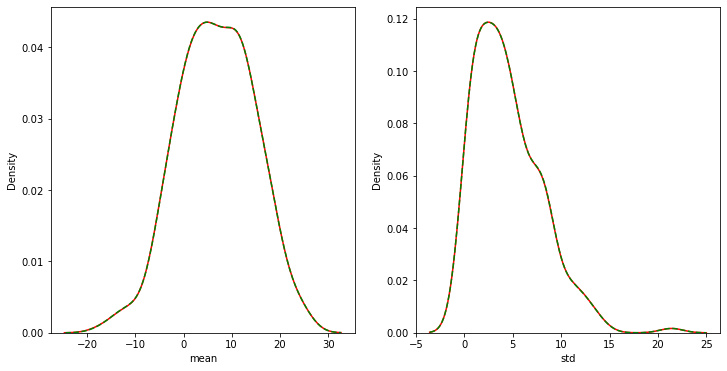

In [39]:
%%time

features = ['mean', 'std']

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
for num, feature in enumerate(features):
    train_stat_copy, test_stat_copy = train_stat[feature].copy(), test_stat[feature].copy()
    sns.kdeplot(train_stat_copy, ax=axes[num], color="red", label="train")
    sns.kdeplot(test_stat_copy, ax=axes[num], color="green", linestyle="dashed", label="test")

### Вывод:

1. Существенных отличий для основных статистик на обучающей и тестовой выборках не наблюдается. Распределения основных статистик обеих выборок схожи.
2. Средние значения и стандартные отклонения в разрезе целевой переменной для некоторых признаков очень близки. Возможно, эти признаки не информативны.

## Задание 5: 
* Построить распределение коэффициентов корреляции между признаками. 
* Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

### Корреляция между числовыми признаками

In [50]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
var_1      0.050343
var_179    0.050002
var_40     0.049530
var_184    0.048315
var_78     0.048245
var_170    0.047973
var_191    0.047114
var_94     0.046296
var_67     0.044673
var_18     0.043479
var_173    0.042022
var_164    0.040997
var_118    0.040358
var_147    0.040280
var_91     0.040127
var_89     0.039369
var_95     0.038531
var_155    0.037240
var_35     0.036567
var_71     0.033607
var_106    0.032947
var_162    0.032647
var_157    0.032642
var_48     0.032334
var_163    0.031811
var_180    0.031190
var_5      0.030979
var_119    0.030975
var_145    0.030917
var_167    0.030797
var_49     0.030612
var_32     0.030513
var_130    0.029917
var_90     0.029395
var_24     0.028477
var_195    0.028285
var_125    0.028223
var_135    0.027944
var_52     0.027754


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

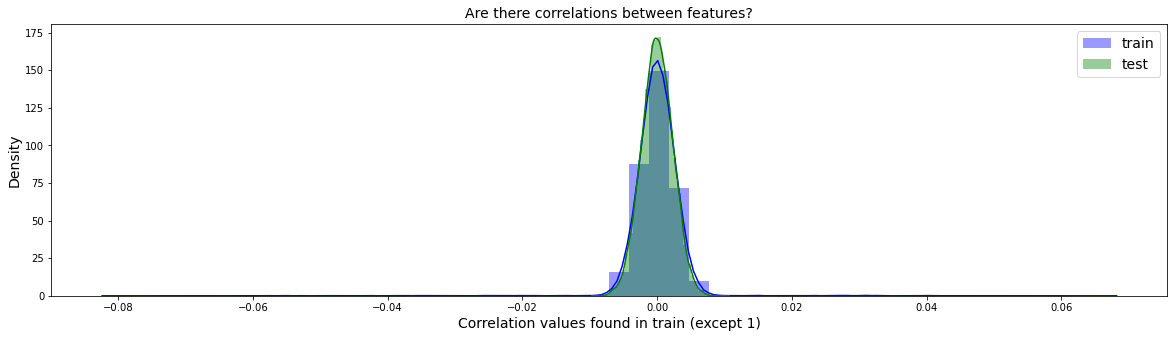

In [51]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

### Correlation Heat Map

<AxesSubplot:title={'center':'Correlation of Numeric Features with target'}>

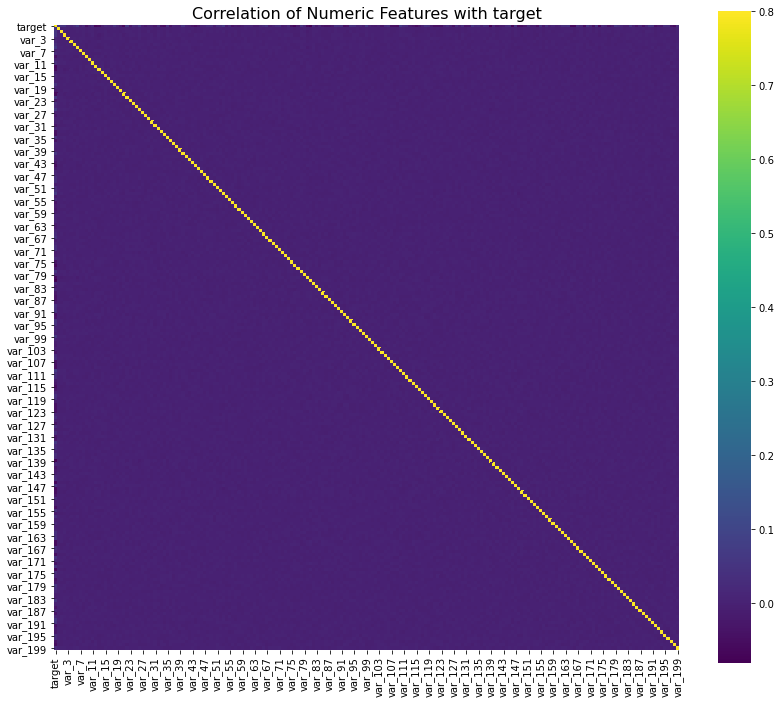

In [48]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with target", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

### Heat Map для отдельных признаков
Посмотрим корреляцию признаков с целевой переменной на увеличенной тепловой карте.

<AxesSubplot:>

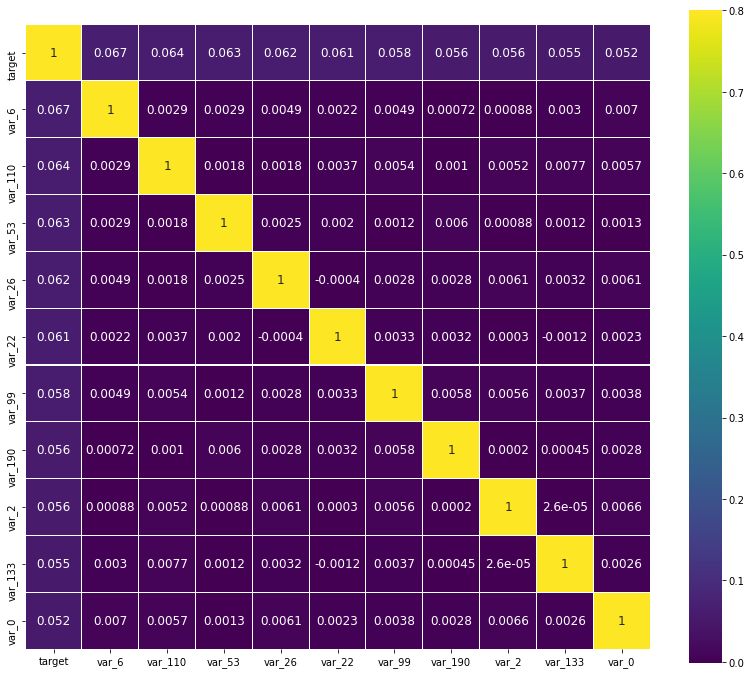

In [49]:
k = 11
cols = correlation.nlargest(k, "target")["target"].index
cm = np.corrcoef(train[cols].values.T)
fig, axes = plt.subplots(figsize = (14, 12))

sns.heatmap(
    cm,
    vmax=.8,
    linewidths=0.01,
    cmap="viridis",
    square=True,
    annot=True,
    linecolor="white",
    xticklabels=cols.values,
    annot_kws = {"size": 12},
    yticklabels=cols.values
)

### Вывод:
1. Признаки весьма слабо коррелируют с целевой переменной `target`. Линейная связь признаков с целевой переменной не выявлена.
2. Признаки не скоррелированы между собой

## Задание 6: 
Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

### Случайный лес дял выбора 10 наиболее значимых признаков.

In [52]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(numerical_features.fillna(-9999).drop("target", axis=1), target)

Wall time: 7min 29s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

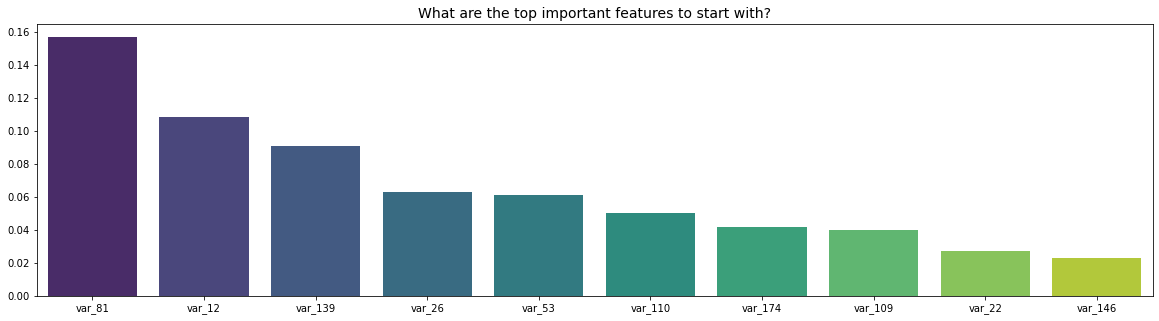

In [53]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

### Вывод:

* Существенной нелинейной связи признаков с целевой переменной не выявлено.

## Задание 7 (опция): 
Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Совпадение распределений на выборке для обучения и для тестирования - одна из ключевых коцепций статистического обучения. Обучая модель на некоторых данных, мы принимаем гипотезу о том, что модель должна работать на таких же данных.

### Kolmogorov-Smirnov Test

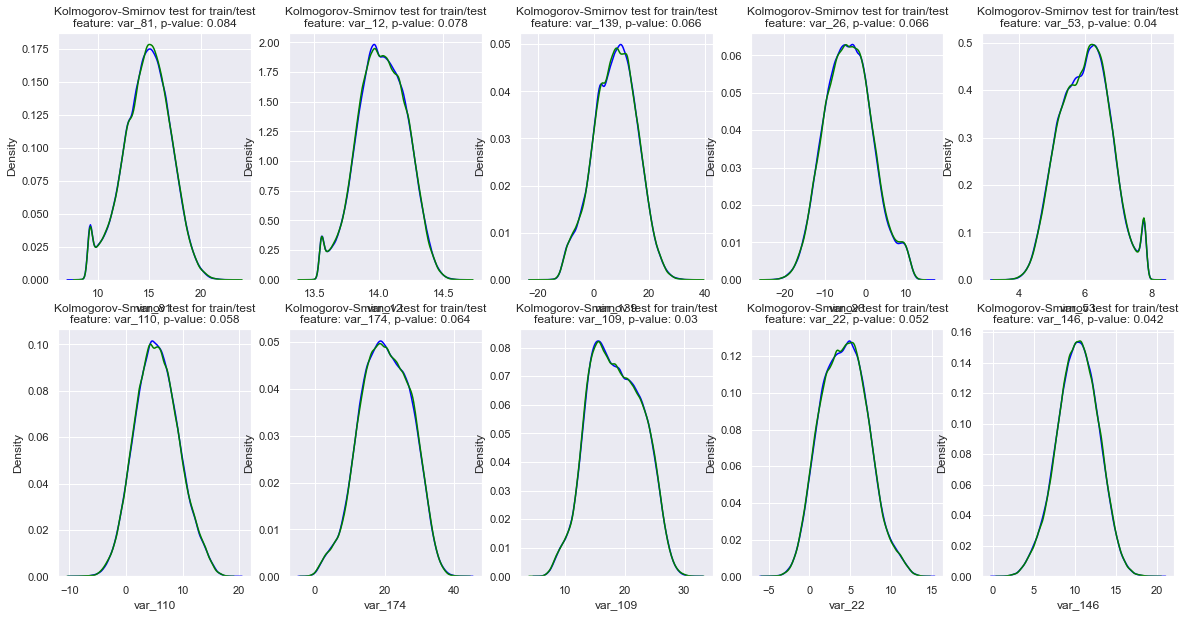

In [64]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(test[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

### Population Stability Index

In [61]:
class PSI(BaseEstimator, TransformerMixin):
    """
    Вычисление PSI и отбор признаков на их основе.

    Parameters
    ----------
    threshold: float
        Порог для отбора переменных по PSI.
        Если PSI для переменной выше порога - переменная макрируется
        0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

    categorical_features: List[str], optional, default = None
        Список категориальных признаков для анализа.
        Опциональный параметр, по умолчанию, не используется, т.е.
        категориальные признаки отсутствуют.

    n_bins: int, optional, default = 20
        Количество бинов, на которые разбивается выборка.

    min_value: float, optional, default = 0.005
        Значение которое используется, если рассчитанный psi = 0.

    bin_type: string, optional, default = "quanitles"
        Способ разбиения на бины: "quantiles" or "bins".
        При выборе "quantiles" - выборка будет разбита на n_bins
        квантилей, при выборке "bins" - выборка будет разбита на
        n_bins бакетов с равным шагом между бакетами.
        Иные значения приводят к возникновению ValueError.

    Attributes
    ----------
    scores_: Dict[str, float]
        Словарь со значениями PSI,
        ключ словаря - название признака, значение - PSI-score.

    """
    def __init__(self,
                 threshold: float,
                 categorical_features: Optional[List[str]] = None,
                 bin_type: str = "quantiles",
                 min_value: float = 0.005,
                 n_bins: int = 20):

        self.threshold = threshold
        self.categorical_features = categorical_features
        self.min_value = min_value
        self.n_bins = n_bins
        if bin_type in ["quantiles", "bins"]:
            self.bin_type = bin_type
        else:
            raise ValueError(
                "Incorrect bin_type value. Expected 'quantiles' or 'bins', "
                f"but {bin_type} is transferred."
            )
        self.scores = {}

    def calculate_bins(self, data: pd.Series) -> np.array:
        """
        Вычисление границ бинов для разбиения выборки.

        Parameters
        ----------
        data: pandas.Series, shape = [n_samples, ]
            наблюдения из train-выборки.

        Returns
        -------
        bins: numpy.array, shape = [self.n_bins + 1]
            Список с границами бинов.

        """
        if self.bin_type == "quantiles":
            bins = np.linspace(0, 100, self.n_bins + 1)
            bins = [np.nanpercentile(data, x) for x in bins]

        else:
            bins = np.linspace(data.min(), data.max(), self.n_bins + 1)

        return np.unique(bins)

    def calculate_psi_in_bin(self, expected_score, actual_score) -> float:
        """
        Вычисление значения psi для одного бакета.

        Осуществляется проверка на равенство нулю expected_score и
        actual_score: если один из аргументов равен нулю, то его
        значение заменяется на self.min_value.

        Parameters
        ----------
        expected_score: float
            Ожидаемое значение.

        actual_score: float
            Наблюдаемое значение.

        Returns
        -------
        value: float
            Значение psi в бине.

        """
        if expected_score == 0:
            expected_score = self.min_value
        if actual_score == 0:
            actual_score = self.min_value

        value = (expected_score - actual_score)
        value = value * np.log(expected_score / actual_score)

        return value

    def calculate_psi(self, expected: pd.Series, actual: pd.Series, bins) -> float:
        """
        Расчет PSI для одной переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        bins: pandas.Series, shape = [self.n_bins, ]
            Бины для расчета PSI.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        expected_score = np.histogram(expected.fillna(-9999), bins)[0]
        expected_score = expected_score / expected.shape[0]

        actual_score = np.histogram(actual.fillna(-9999), bins)[0]
        actual_score = actual_score / actual.shape[0]

        psi_score = np.sum(
            self.calculate_psi_in_bin(exp_score, act_score)
            for exp_score, act_score in zip(expected_score, actual_score)
        )

        return psi_score

    def calculate_numeric_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для числовой переменной.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = self.calculate_bins(expected)
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def calculate_categorical_psi(self, expected: pd.Series, actual: pd.Series) -> float:
        """
        Вычисление PSI для категориальной переменной.
        PSI рассчитывается для каждого уникального значения категории.

        Parameters
        ----------
        expected: pandas.Series, shape = [n_samples_e, ]
            Наблюдения из train-выборки.

        actual: pandas.Series, shape = [n_samples_o, ]
            Наблюдения из test-выборки.

        Returns
        -------
        psi_score: float
            PSI-значение для данной пары выборок.

        """
        bins = np.unique(expected).tolist()
        psi_score = self.calculate_psi(expected, actual, bins)
        return psi_score

    def fit(self, X, y=None):
        """
        Вычисление PSI-значения для всех признаков.

        Parameters
        ----------
        X: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        y: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        self
        """
        missed_columns = list(set(X.columns) - set(y.columns))

        if missed_columns:
            raise MissedColumnError(
                f"Missed {list(missed_columns)} columns in data.")

        if self.categorical_features:
            numeric_features = list(
                set(X.columns) - set(self.categorical_features)
            )
            for feature in self.categorical_features:
                self.scores[feature] = self.calculate_categorical_psi(
                    X[feature], y[feature]
                )
        else:
            numeric_features = X.columns

        for feature in tqdm(numeric_features):
            self.scores[feature] = self.calculate_numeric_psi(
                X[feature], y[feature]
            )
        return self

    def transform(self, X, y=None) -> pd.DataFrame:
        """
        Отбор переменных по self.threshold.
        Если PSI-score для переменной выше порога, то переменная
        помечается 0 (не использовать для дальнейшего анализа), если ниже
        порога - маркируется 1 (использовать для дальнейшего анализа).

        Parameters
        ----------
        data: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для обучения.

        target: pandas.DataFrame, shape = [n_samples, n_features]
            Матрица признаков для тестирования.

        Returns
        -------
        scores: pandas.DataFrame, shape = [n_features, 3]
            Датафрейм с PSI-анализом переменных.

        """
        check_is_fitted(self, "scores")
        scores = pd.Series(self.scores)
        scores = pd.DataFrame({"Variable": scores.index, "PSI": scores.values})
        scores["Selected"] = np.where(scores.PSI < self.threshold, 1, 0)
        scores = scores.sort_values(by="PSI")

        mask = scores["Selected"] == 1
        self.used_features = scores.loc[mask, "Variable"].tolist()

        return scores.reset_index(drop=True)

In [62]:
features_to_score = numerical_features.drop(["target"], axis=1).columns.tolist()
psi = PSI(threshold=0.01)

In [63]:
psi.fit_transform(
    X=train[features_to_score],
    y=test[features_to_score]
)

  0%|                                                                                          | 0/200 [00:00<?, ?it/s]<ipython-input-61-b3cb30ead4e5>:141: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  psi_score = np.sum(
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:29<00:00,  6.74it/s]


Variable       PSI  Selected
0    var_154  0.000085         1
1    var_156  0.000132         1
2      var_5  0.000138         1
3    var_148  0.000150         1
4     var_35  0.000151         1
5    var_197  0.000168         1
6     var_36  0.000169         1
7     var_71  0.000178         1
8    var_179  0.000179         1
9     var_61  0.000183         1
10   var_144  0.000183         1
11    var_86  0.000185         1
12    var_41  0.000188         1
13    var_47  0.000189         1
14   var_132  0.000194         1
15   var_181  0.000194         1
16    var_38  0.000195         1
17   var_107  0.000196         1
18   var_171  0.000197         1
19    var_60  0.000198         1
20   var_196  0.000199         1
21    var_27  0.000200         1
22   var_157  0.000201         1
23   var_184  0.000203         1
24    var_16  0.000203         1
25    var_40  0.000204         1
26     var_7  0.000205         1
27    var_13  0.000205         1
28    var_78  0.000206         1
29    var_96  0.000206         1
30   var_194  0.000208         1
31   var_178  0.000208         1
32   var_112  0.000209         1
33   var_109  0.000220         1
34    var_31  0.000223         1
35   var_150  0.000225         1
36   var_105  0.000226         1
37   var_118  0.000226         1
38    var_17  0.000227         1
39   var_175  0.000228         1
40     var_9  0.000228         1
41   var_164  0.000230         1
42   var_170  0.000233         1
43    var_55  0.000235         1
44    var_63  0.000236         1
45   var_163  0.000236         1
46    var_24  0.000238         1
47    var_51  0.000238         1
48     var_1  0.000240         1
49    var_58  0.000243         1
50   var_167  0.000243         1
51    var_69  0.000244         1
52    var_66  0.000251         1
53    var_54  0.000251         1
54   var_141  0.000251         1
55    var_68  0.000251         1
56    var_39  0.000252         1
57    var_37  0.000254         1
58    var_30  0.000255         1
59    var_11  0.000258         1
60   var_104  0.000258         1
61    var_84  0.000259         1
62   var_165  0.000259         1
63    var_93  0.000262         1
64    var_50  0.000262         1
65   var_183  0.000263         1
66    var_98  0.000263         1
67    var_64  0.000264         1
68    var_18  0.000266         1
69   var_166  0.000268         1
70   var_145  0.000271         1
71    var_80  0.000273         1
72     var_6  0.000273         1
73   var_128  0.000275         1
74   var_187  0.000275         1
75   var_131  0.000276         1
76   var_174  0.000278         1
77    var_89  0.000278         1
78   var_101  0.000288         1
79   var_110  0.000290         1
80    var_77  0.000291         1
81    var_28  0.000292         1
82    var_45  0.000293         1
83   var_116  0.000293         1
84    var_81  0.000298         1
85   var_195  0.000298         1
86   var_192  0.000299         1
87    var_73  0.000304         1
88   var_102  0.000304         1
89   var_140  0.000305         1
90    var_22  0.000306         1
91    var_65  0.000307         1
92    var_59  0.000309         1
93   var_198  0.000309         1
94    var_44  0.000310         1
95   var_114  0.000311         1
96   var_146  0.000311         1
97    var_34  0.000311         1
98    var_19  0.000313         1
99   var_147  0.000313         1
100  var_123  0.000315         1
101  var_160  0.000316         1
102   var_75  0.000317         1
103  var_143  0.000319         1
104   var_99  0.000319         1
105  var_191  0.000320         1
106  var_149  0.000322         1
107  var_100  0.000323         1
108  var_176  0.000324         1
109  var_153  0.000324         1
110  var_108  0.000325         1
111    var_4  0.000325         1
112   var_33  0.000326         1
113  var_119  0.000327         1
114  var_122  0.000330         1
115  var_111  0.000331         1
116  var_129  0.000332         1
117  var_125  0.000334         1
118    var_0  0.000335         1
119   var_57  0.000336         1
120  var_15

### Adversarial Validation

In [56]:
features_to_score = numerical_features.drop(["target"], axis=1).columns.tolist()

X_adv = pd.concat([
    train[features_to_score], test[features_to_score]
])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [58]:
%%time
parameters = {"max_depth": 4, "n_estimators": 50, "random_state": 27, "n_jobs": 2}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=3, shuffle=True, random_state=27)
)
print(f"CV-score: {round(np.mean(cv), 4)}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:45:10] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:50] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:25] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV-score: 0.5116
Wall time: 14min


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:01] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

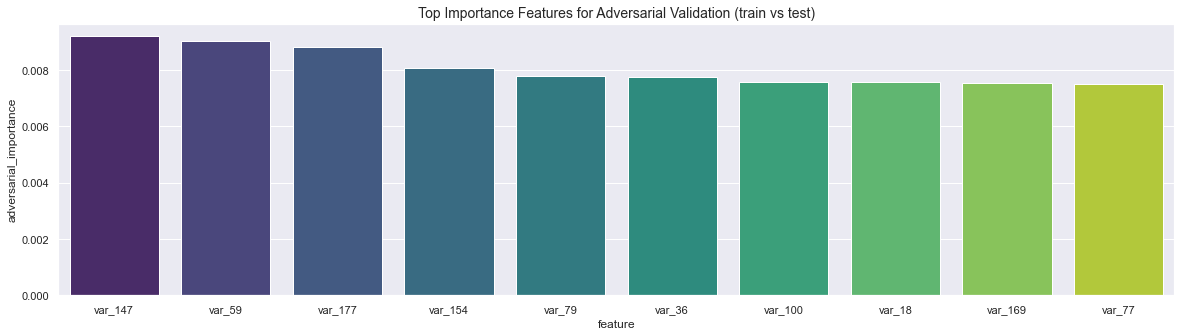

In [59]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)

### Вывод:

* Метрика roc_auc равна 0.5116. Классификатор не отличает обучающую выборку от тестовой выборки. Данные обеих выборок из одного распределения.